In [1]:
import pyautogui
import pandas as pd
from detecto.core import Model
from funcions import adquirir_dataset
model1 = Model.load('models basats.pth', ['zombie', 'pig'])#aixo ha d anat a funcions i read image tambe i totes les llibreries possibles
import pygad
import numpy
import win32.lib.win32con as win32con
import win32api
import time
import random
import pygad
import pygad.nn
import pygad.gann
import cv2
import pyautogui
import pydirectinput
import numpy as np
from detecto.core import Model
from detecto.utils import read_image
mort_template = cv2.imread('respawn nena.jpg')

In [2]:
#OPCIO A: MAPA MENTAL I BIAS A CADA CAwwSELLA -> ACABAR PER EIXE DIVIDIT PER CINC

In [3]:
#investigar funció fitness?
#posar un mini delay per a anar a la pantalla del joc QUAN??

In [4]:
def fitness_function(solution, solution_idx): #AIXO EVENTUALMENT ES CONVERTIRÀ EN LA FITNESS FUNCTION O POTSER STARA DINS LA FITNESS FUNCTION AMB UN PARAMETRE QUE SIGUI SOLUTIONwww
    #INICIAR COMPTA
    #print("entrem")
    #ESTIC MORT?-----------------------------------------------
    mort = 0
    start = time.time() 
    
    #print("manin")
    while mort == 0:
        #print("no stem morts")
        visio = pyautogui.screenshot("currentImg.jpeg", region=(0,35,2000, 985))
        visio = np.uint8(visio)
        result = cv2.matchTemplate(visio, mort_template, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        #print (max_val)
        if max_val >=0.95:
            mort = 1
            #respawn donant click a respawn i començar el següent
        else:
            #print("def q no estem morts")
            #AQUI HEM DE POSAR TOT EL CODI FUNCIONAL----------------------------------
            function_inputs = adquirir_dataset(model1) #[:9]el :9 per agafar els 3 elements més propers
            #print("inputs",function_inputs)
            #print ("still working 5")
            if len(function_inputs) != 0:
                #print ("still working 5.25", function_inputs)
                function_inputs = function_inputs #.to_numpy()
                #print ("still working 5.5")
                function_inputs = function_inputs.to_numpy().flatten()[:9]
                print("function inputs 5.75", function_inputs)
            #print ("still working 6")
            if len(function_inputs) == 0:
                function_inputs=[0,0,0,0,0,0,0,0,0]
            elif len(function_inputs) <4:
                function_inputs = list(function_inputs)
                #print("function inputs pre extensio 3", function_inputs)
                function_inputs.append(0)#I ACI
                #wprint(function_inputs)
                function_inputs.append(0)
                function_inputs.append(0)
                function_inputs.append(0)
                function_inputs.append(0)
                function_inputs.append(0)
                #print("function inputs post extensio 3.2", function_inputs)
            elif len(function_inputs) <7:
                function_inputs = list(function_inputs)
                print("function inputs pre extensio 6", function_inputs)
                #function_inputs =function_inputs.extend([0,0,0])#EL ERROR ES  posar appends seguits
                function_inputs.append(0)
                #wwprint(function_inputs)
                function_inputs.append(0)
                function_inputs.append(0)
                #print("function inputs post extensio 6.2", function_inputs)
            else:
                print("nai què collons?", function_inputs)
            
            #print("1", solution[0:9])
            #print("2",function_inputs)
            
            valor_w = (solution[0:9]*function_inputs).sum(axis=0) #RESTRUCTURAR XARXA NEURONAL I PENSAR ALTRE KOPF COM VA
            valor_dreta = (solution[9:18]*function_inputs).sum(axis=0)
            valor_esquerra = (solution[18:]*function_inputs).sum(axis=0)
            #print("valors calculats")
            
            #Comparar i decidir quin és millor
            resultat = max(valor_dreta,valor_esquerra,valor_w)
            #print("valors maximitzats")
            #executar es millor durant un temps, i tornar a checkejar l'estat
            if resultat ==valor_w:
                print("endavant")
                pydirectinput.keyDown('w')
                time.sleep(10)
                pydirectinput.keyUp('w')
            elif resultat == valor_dreta:
                print("dreta")
                win32api.mouse_event(win32con.MOUSEEVENTF_MOVE, 100, 0, 0, 0)
            elif resultat == valor_esquerra:
                print("esquerra")
                win32api.mouse_event(win32con.MOUSEEVENTF_MOVE, 0, 100, 0, 0)
    
    end = time.time()
    pyautogui.click(x=1091, y=605)
    pyautogui.click(x=1091, y=605)
    return(end - start)

In [5]:
function_inputs=[0,0,0,0,0,0,0,0,0]

In [6]:
num_generations = 10
num_parents_mating = 4

sol_per_pop = 4
num_genes = 3* len(function_inputs) #multiplicat per 3 perq hi ha 3 outputs

init_range_low = -2
init_range_high = 5

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 30

In [7]:
import pygad
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       save_best_solutions=True,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

c:\users\tomàs\appdata\local\programs\python\python36\lib\site-packages\pygad\pygad.py:787: UserWarning: Use the 'save_best_solutions' parameter with caution as it may cause memory overflow when either the number of generations or number of genes is large.
  if not self.suppress_warnings: warnings.warn("Use the 'save_best_solutions' parameter with caution as it may cause memory overflow when either the number of generations or number of genes is large.")


In [8]:
ga_instance.run() #PRINTEJAR TOT

c:\users\tomàs\appdata\local\programs\python\python36\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


entitats_input      0            1  3
0  213   615.889679  1
1  136  1209.781677  1
function inputs 5.75 [2.13000000e+02 6.15889679e+02 1.00000000e+00 1.36000000e+02
 1.20978168e+03 1.00000000e+00]
function inputs pre extensio 6 [213.0, 615.8896789550781, 1.0, 136.0, 1209.7816772460938, 1.0]
esquerra
entitats_input      0            1  3
0  125  1159.087158  1
1  122  1030.625214  1
2  122  1350.891663  1
function inputs 5.75 [1.25000000e+02 1.15908716e+03 1.00000000e+00 1.22000000e+02
 1.03062521e+03 1.00000000e+00 1.22000000e+02 1.35089166e+03
 1.00000000e+00]
nai què collons? [1.25000000e+02 1.15908716e+03 1.00000000e+00 1.22000000e+02
 1.03062521e+03 1.00000000e+00 1.22000000e+02 1.35089166e+03
 1.00000000e+00]
esquerra
entitats_input     0           1  3
0  63  718.222778  0
function inputs 5.75 [ 63.         718.22277832   0.        ]
dreta
entitats_input []
endavant
entitats_input []
endavant
entitats_input []
endavant
entitats_input     0           1  3
0  61  699.719635  0
fun

KeyboardInterrupt: 

In [9]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()  #MOLT IMPORTANT PER TROBAR LA XARXA MES BONA
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

entitats_input     0           1  3
0  36  722.445648  1
function inputs 5.75 [ 36.         722.44564819   1.        ]
endavant
entitats_input     0           1  3
0  36  722.479218  1
function inputs 5.75 [ 36.         722.47921753   1.        ]
endavant
entitats_input []
endavant
entitats_input []
endavant
entitats_input     0           1  3
0  36  722.479889  1
function inputs 5.75 [ 36.         722.47988892   1.        ]
endavant
entitats_input []
endavant


KeyboardInterrupt: 

c:\users\tomàs\appdata\local\programs\python\python36\lib\site-packages\pygad\pygad.py:3142: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.")


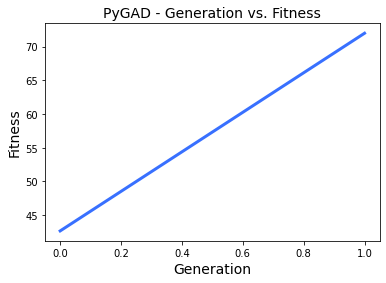

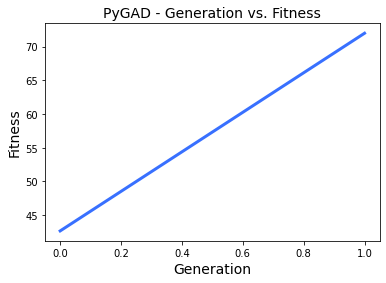

In [10]:
ga_instance.plot_result()

In [ ]:
wga_instance.plot_genes(solutions="best") #Que simbolitzen tots els pesos de la xarxa neuronal.

In [ ]:
#el redactat en dues o una columna?

In [ ]:
a=[5,3,4]
numpy.where(a == [5,3,4])[0].size

In [ ]:
#temps = 0
#while(1):
    #eventualment aixo s ha de convertir amb una funcio fitness que retorni el resultat en minuts del temps de vida 

In [ ]:
import random
function_inputs= [2,random.randint(1,2),random.randint(1,2),random.randint(1,2),random.randint(1,2)]

In [ ]:
function_inputs = [89, 1130.0458984375, 'zombie', 79, 158.02662658691406, 'zombie',
       76, 1786.3193359375, 'zombie']

In [ ]:
cosa =[3,4,5,6,7]
lala = [2,3,3]
lol = cosa*lala
lol.sum(axis=1)

In [ ]:
import numpy
function_inputs = [4,-2,3.5,5,-11,-4.7]  # Function inputs. #APLICAR AQUI TOTES LES MODIFICACIONS QUE ESCALGUIN

desired_output = 44  # Function output.

def fitness_func(solution, solution_idx):

    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / numpy.abs(output - desired_output)
    return fitness

sol_per_pop = 10
num_genes = len(function_inputs)

init_range_low = -2
init_range_high = 5

mutation_percent_genes = 1

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating, 
                       fitness_func=fitness_func,
                       sol_per_pop=sol_per_pop, 
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       mutation_percent_genes=mutation_percent_genes)

ga_instance.run()

In [ ]:
ga_instance.plot_result()

In [ ]:
function_inputs

In [ ]:
x = 5
time.sleep(x)
pydirectinput.keyDown('w')
time.sleep(x)
pydirectinput.keyUp('w')

In [ ]:
time.sleep(5)
import pydirectinput

In [ ]:
lambo=[0,0,0,0]
lambo.extend([5,8])
lambo[:4]

In [ ]:
time.sleep(5)
pyautogui.position()

In [ ]:
wwww